In [1]:
from matplotlib import pyplot as plt
import pandas as pd

# Usage:
unzip `Google Data.zip` to the same directory as this `.ipynb`. It will generate `google_{grid,sk,3reg}.npz` in this directory. 

In [2]:
data_dir = 'Google_Data'
df_landscape = pd.read_pickle(f'{data_dir}/landscapes.pickl')

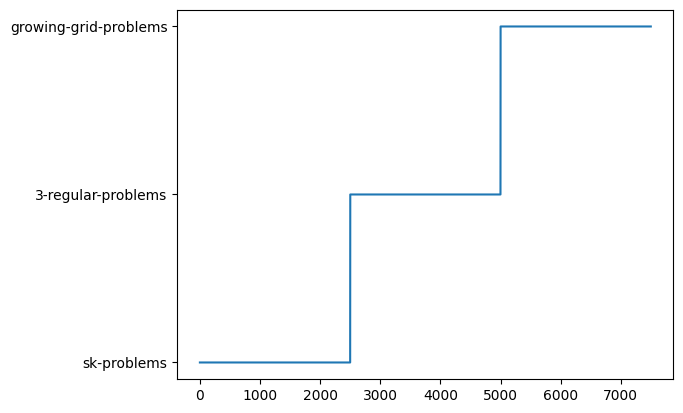

In [3]:
plt.plot(df_landscape['problem_generation_id'])

In [4]:
df_landscape.head()
# print(len(df_landscape))

,gamma_i,beta_i,timestamp,bitstrings,qubit_order,n_shots,x_grid_num,y_grid_num,problem_generation_id,n_qubits,...,min_c,max_c,corr_energies,uncorr_energies,corr_energy,uncorr_energy,xlim0,xlim1,ylim0,ylim1
0,18,18,2019-12-14 00:54:52.622146,"[[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], [0, 0, 1, ...","[q(9, 4), q(8, 4), q(8, 5), q(7, 5), q(7, 4), ...",50000,50,50,sk-problems,11,...,-29.0,27.0,"[8.16689390139272, -5.89238378441452, -6.36606...","[7.0, -5.0, -5.0, -5.0, 3.0, -1.0, -5.0, -5.0,...",-0.128822,-0.10888,0,1.570796,-0.785398,0.785398
1,41,16,2019-12-17 15:45:30.448216,"[[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 0, ...","[q(5, 4), q(5, 3), q(4, 3), q(4, 2), q(5, 2), ...",50000,50,50,sk-problems,11,...,-29.0,27.0,"[13.506111177175843, -5.841462056620255, 12.49...","[11.0, -5.0, 11.0, 3.0, -13.0, 27.0, -1.0, -5....",3.311167,2.78568,0,1.570796,-0.785398,0.785398
2,25,4,2019-12-14 04:16:54.800712,"[[0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1], [0, 0, 0, ...","[q(9, 4), q(8, 4), q(8, 5), q(7, 5), q(7, 4), ...",50000,50,50,sk-problems,11,...,-29.0,27.0,"[-15.621714929193008, 13.578792769255278, 4.25...","[-13.0, 11.0, 3.0, -5.0, 7.0, 3.0, 11.0, 7.0, ...",-0.904572,-0.75344,0,1.570796,-0.785398,0.785398
3,36,49,2019-12-14 10:14:46.190848,"[[1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1], [1, 0, 0, ...","[q(9, 4), q(8, 4), q(8, 5), q(7, 5), q(7, 4), ...",50000,50,50,sk-problems,11,...,-29.0,27.0,"[-1.2558841959376754, 17.956759182403907, 3.03...","[-1.0, 15.0, 3.0, 3.0, 3.0, 3.0, 7.0, 7.0, 7.0...",-0.131582,-0.10488,0,1.570796,-0.785398,0.785398
4,44,22,2019-12-17 17:16:55.159206,"[[0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 0, ...","[q(5, 4), q(5, 3), q(4, 3), q(4, 2), q(5, 2), ...",50000,50,50,sk-problems,11,...,-29.0,27.0,"[3.642102845379695, -15.622841997208495, 13.14...","[3.0, -13.0, 11.0, 3.0, -5.0, -5.0, -5.0, 3.0,...",-0.116146,-0.12752,0,1.570796,-0.785398,0.785398


Step-1: Reorder the strings 

Step-2: Compute Beta Gamma Values 


In [5]:
from collections import Counter
def create_list_strings(data_frame,exp_index):
    out_str_list=[]
    list_strings= data_frame['bitstrings'][exp_index]
    for ele in list_strings:
        el1=[str(i) for i in ele]
        str1 = ''.join(el1)
        out_str_list.append(str1)
    
    return out_str_list
    
def create_counter_bitstring(data_frame,exp_index):
    
    out_str_list= create_list_strings(data_frame,exp_index)
    counter_string=Counter(out_str_list)
    
    return counter_string


def create_energy_bitstring_dict(exp_index,data_frame):
    
    output={}
    list_strings = create_list_strings(data_frame,exp_index)
    list_of_energy = data_frame['corr_energies'][exp_index]
    
    for index in range(len(list_strings)):
        output.update({list_strings[index]:list_of_energy[index]})
        
    return output


# def compute_beta(data_frame,exp_index):
#     x_grid_num = int(data_frame['x_grid_num'][exp_index])
#     y_grid_num = int(data_frame['y_grid_num'][exp_index])
#     index_b = data_frame['gamma_i'][exp_index]
#     index_g = data_frame['beta_i'][exp_index]
#     step_x = (data_frame['xlim1'][exp_index] - data_frame['xlim0'][exp_index])/x_grid_num
#     step_y = (data_frame['ylim1'][exp_index] - data_frame['ylim0'][exp_index])/y_grid_num
    
    
    
    
#     beta=[]
#     gamma=[]
    
#     for i in range(x_grid_num):
#         gamma.append(data_frame['xlim0'][exp_index]+i*step_x)
    
#     for i in range(y_grid_num):
#         beta.append(data_frame['ylim0'][exp_index]+i*step_y)
        
    
    
#     return [beta[index_b]]


def compute_beta(data_frame,exp_index):
    x_grid_num = int(data_frame['x_grid_num'][exp_index])
    y_grid_num = int(data_frame['y_grid_num'][exp_index])
    index_b = data_frame['gamma_i'][exp_index]
    index_g = data_frame['beta_i'][exp_index]
    step_x = (data_frame['xlim1'][exp_index] - data_frame['xlim0'][exp_index])/x_grid_num
    step_y = (data_frame['ylim1'][exp_index] - data_frame['ylim0'][exp_index])/y_grid_num
    
    
    
    
    beta=[]
    gamma=[]
    
    for i in range(x_grid_num):
        gamma.append(data_frame['xlim0'][exp_index]+i*step_x)
    
    for i in range(y_grid_num):
        beta.append(data_frame['ylim0'][exp_index]+i*step_y)
        
    
    
    return beta[index_b]


def compute_gamma(data_frame,exp_index):
    x_grid_num = int(data_frame['x_grid_num'][exp_index])
    y_grid_num = int(data_frame['y_grid_num'][exp_index])
    index_b = data_frame['gamma_i'][exp_index]
    index_g = data_frame['beta_i'][exp_index]
    step_x = (data_frame['xlim1'][exp_index] - data_frame['xlim0'][exp_index])/x_grid_num
    step_y = (data_frame['ylim1'][exp_index] - data_frame['ylim0'][exp_index])/y_grid_num
    
    
    
    
    beta=[]
    gamma=[]
    
    for i in range(x_grid_num):
        gamma.append(data_frame['xlim0'][exp_index]+i*step_x)
    
    for i in range(y_grid_num):
        beta.append(data_frame['ylim0'][exp_index]+i*step_y)
        
    
    
    return gamma[index_g]



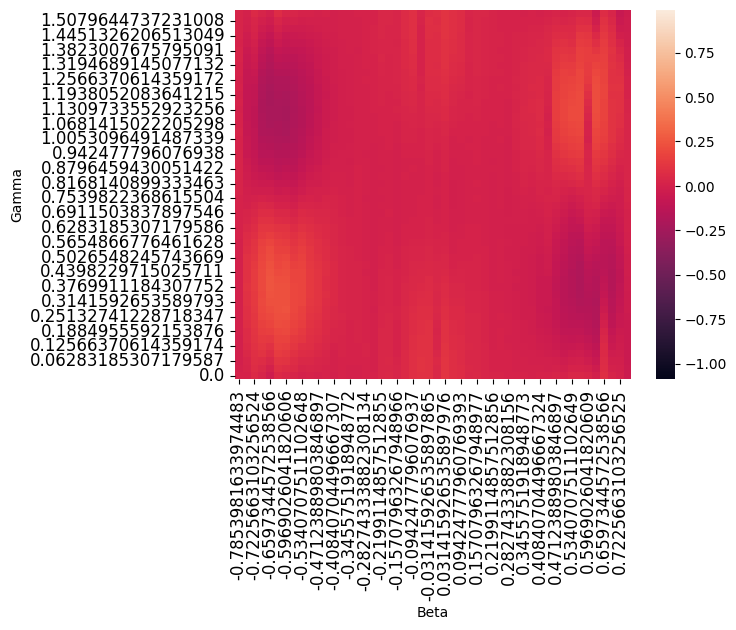

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def save_landscape(betas, gammas, energies, type):
    # mat = np.array(df)

    bounds = {
        "beta": [-0.785398, 0.785398],
        "gamma": [0, 1.570796]
    }

    np.savez_compressed(f"google_{type}", 
        betas=betas, gammas=gammas, energies=energies, bounds=bounds)

GM = []
BT =[]
E = []

## use exp_id from 0 to 2500 to get sk problem data 
for i in range(0,2500):
    gamma = compute_gamma(data_frame=df_landscape,exp_index=i)
    beta = compute_beta(data_frame=df_landscape,exp_index=i)
    GM.append(gamma)
    BT.append(beta)
    E.append(df_landscape['corr_energy'][i]/df_landscape['min_c'][i])
    

data = pd.DataFrame(data={'Beta':BT, 'Gamma':GM, 'E':E})
data = data.pivot(index='Gamma', columns='Beta', values='E')
ax=sns.heatmap(data,vmin=0.99, vmax=-0.99)

save_landscape(betas=BT, gammas=GM, energies=E, type="sk")

ax.invert_yaxis()
plt.yticks(rotation = 0,fontsize=12)
plt.xticks(rotation = 90,fontsize=12)


# plt.savefig('baseline_google_heatmap_sk.pdf', bbox_inches='tight')

plt.show()
    

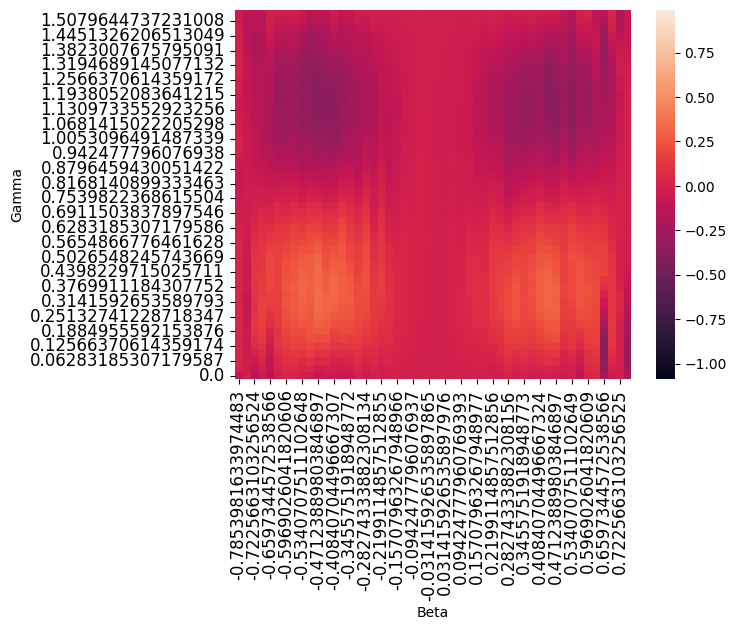

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

GM = []
BT =[]
E = []

## use exp_id from 2500 to 5000 to get 3-reg problem
for i in range(2500,5000):
    gamma = compute_gamma(data_frame=df_landscape,exp_index=i)
    beta = compute_beta(data_frame=df_landscape,exp_index=i)
    GM.append(gamma)
    BT.append(beta)
    E.append(df_landscape['corr_energy'][i]/df_landscape['min_c'][i])
    

data = pd.DataFrame(data={'Beta':BT, 'Gamma':GM, 'E':E})
data = data.pivot(index='Gamma', columns='Beta', values='E')
ax=sns.heatmap(data,vmin=0.99, vmax=-0.99)

save_landscape(betas=BT, gammas=GM, energies=E, type="3reg")

ax.invert_yaxis()
plt.yticks(rotation = 0,fontsize=12)
plt.xticks(rotation = 90,fontsize=12)


# plt.savefig('baseline_google_heatmap.pdf', bbox_inches='tight')

plt.show()

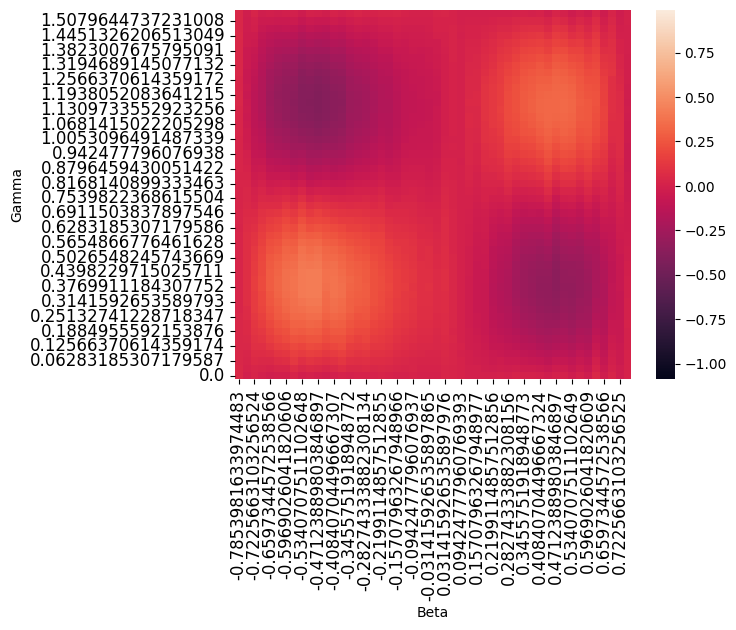

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt





import numpy as np
GM = []
BT =[]
E = []


## use exp_id from 5000 to 7500 to get grid problems
for i in range(5000,7500):
    gamma = compute_gamma(data_frame=df_landscape,exp_index=i)
    beta = compute_beta(data_frame=df_landscape,exp_index=i)
    GM.append(gamma)
    BT.append(beta)
    E.append(df_landscape['corr_energy'][i]/df_landscape['min_c'][i])
    

data = pd.DataFrame(data={'Beta':BT, 'Gamma':GM, 'E':E})
data = data.pivot(index='Gamma', columns='Beta', values='E')
ax=sns.heatmap(data,vmin=0.99, vmax=-0.99)

# print(data.shape)
# print(data.iloc[0])

save_landscape(betas=BT, gammas=GM, energies=E, type="grid")

# 0	1.570796	-0.785398	0.785398
# xlim0	xlim1	ylim0	ylim1
# gamma         beta
# print(mat.shape)

ax.invert_yaxis()
plt.yticks(rotation = 0,fontsize=12)
plt.xticks(rotation = 90,fontsize=12)


# plt.savefig('baseline_google_heatmap_grid.pdf', bbox_inches='tight')

plt.show()


